In [1]:
import pandas as pd

In [5]:
#importando a base de dados em arquivo CSV
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#exibindo as 5 primeiras linhas da tabela importada. para exibir mais basta adicionar a qtd no parentese
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
#exibe o nº de linhas e colunas da base
data.shape

(200, 4)

In [11]:
#biblioteca para plotar dados 
import seaborn as sns

%matplotlib inline

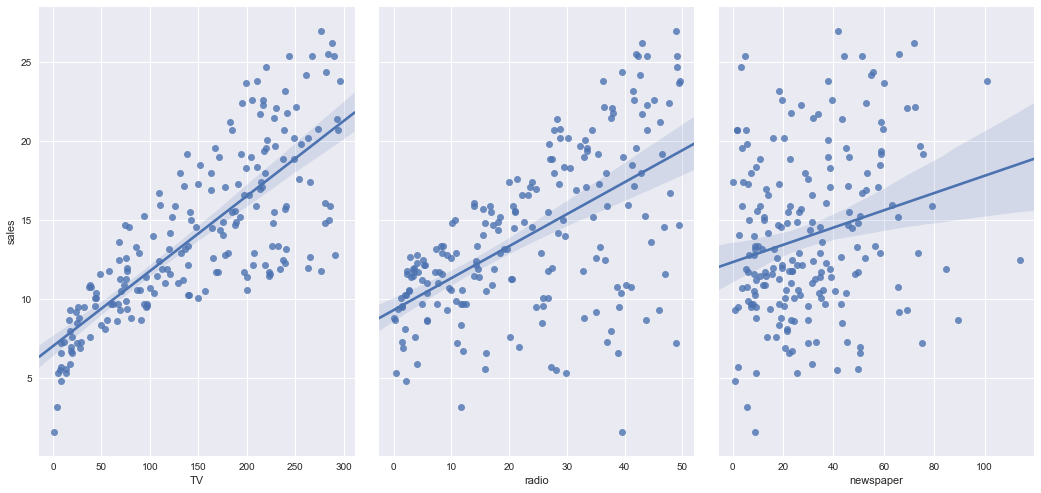

In [17]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper',], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [19]:
feature_cols = ['TV', 'radio', 'newspaper']

x= data[feature_cols]

x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [20]:
#checando os dados gerados

In [24]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [26]:
y= data['sales']

y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [29]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [31]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [32]:
#divisao padrão: 75% para treino
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [34]:
from sklearn.linear_model import LinearRegression 

linreg = LinearRegression()

#treinando os dados
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [38]:
list(zip(feature_cols, linreg.coef_))


[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111803788)]

In [39]:
#gerando a previsao baseado no valor do teste
y_pred = linreg.predict(x_test)

In [43]:
from sklearn import metrics
import numpy as np
#gera a previsão da média de erro. a previsão ideal e zero
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [45]:
#testando novamente, removendo a feature newspaper já que esse destoa do modelo linear
feature_cols = ['TV', 'radio']

x= data[feature_cols]

x.head()

y= data['sales']

y = data.sales

y.head()

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

linreg = LinearRegression()

#treinando os dados
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994
